In [12]:
import pandas as pd
from process_datas import get_X_y, scaler_data, encode_names


data = pd.read_csv('dataset-genres15.csv')
X, y, groups = get_X_y(data)
X = scaler_data(X)
y = encode_names(y)

In [13]:
from classifier import *


Xdf = pd.DataFrame(X)
ydf = pd.DataFrame(y)

keras = Keras()
_, _, _, history = keras.evaluate(Xdf, ydf, groups)

In [14]:
import matplotlib.pyplot as plt
from lc import plot_learning_curve


naive_bayer = GaussianNB()
id3 = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
svm = SVC(kernel='rbf', decision_function_shape='ovo', class_weight='balanced')

In [15]:
st = StratifiedShuffleSplit(n_splits=3)
splits = st.split(X, y, groups)

for train_idx, val_idx in splits:
    X_tr = Xdf.loc[train_idx]
    y_tr = ydf.loc[train_idx]
    
    X_val = Xdf.loc[val_idx]
    y_val = ydf.loc[val_idx]
    
    naive_bayer.fit(X_tr, y_tr)
    id3.fit(X_tr, y_tr)
    knn.fit(X_tr, y_tr)
    svm.fit(X_tr, y_tr)
    break

/home/grettel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/grettel/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/grettel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 3000)              60000     
_________________________________________________________________
dropout_3 (Dropout)          (None, 3000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1500)              4501500   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1500)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 750)               1125750   
_________________________________________________________________
dropout_5 (Dropout)          (None, 750)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 15)               

(0.3799999952316284, 1.8614470958709717)

/home/grettel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/grettel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/grettel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/grettel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

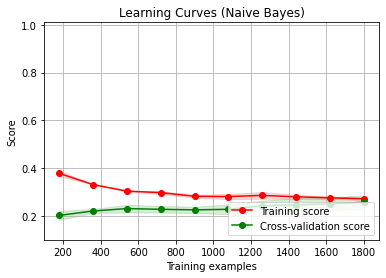

In [16]:
plot_learning_curve(naive_bayer, "Learning Curves (Naive Bayes)", X_tr, y_tr, ylim=(0.1, 1.01))
plt.show()

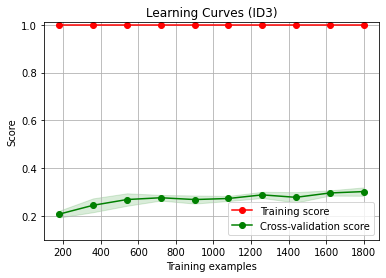

In [17]:
plot_learning_curve(id3, "Learning Curves (ID3)", X_tr, y_tr, ylim=(0.1, 1.01))
plt.show()

/home/grettel/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/grettel/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/grettel/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/grettel/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

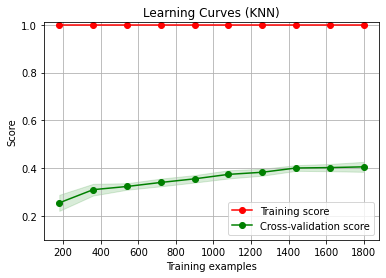

In [18]:
plot_learning_curve(knn, "Learning Curves (KNN)", X_tr, y_tr, ylim=(0.1, 1.01))
plt.show()

/home/grettel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/grettel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/grettel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/grettel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

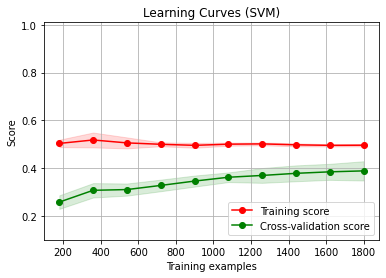

In [19]:
plot_learning_curve(svm, "Learning Curves (SVM)", X_tr, y_tr, ylim=(0.1, 1.01))
plt.show()

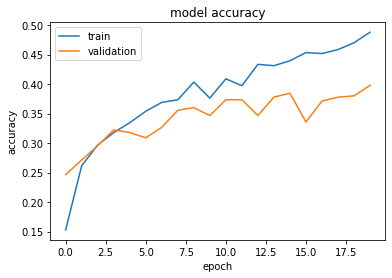

In [20]:
# Learning Curve Keras Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()
                

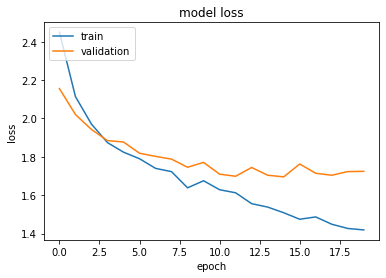

In [21]:
# Learning Curve Keras Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()